In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
(X_train, y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [74]:
len(X_train)

60000

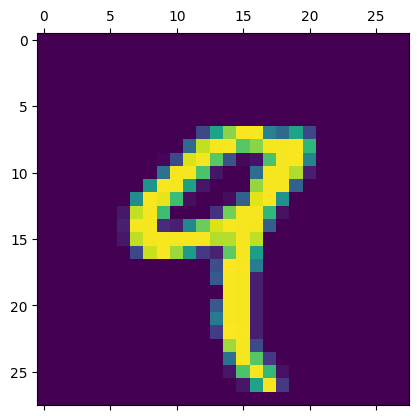

In [75]:
plt.matshow(X_train[4])

In [76]:
X_train.shape

(60000, 28, 28)

In [77]:
X_train=X_train/255
X_test=X_test/255

In [78]:
# flattening the datas set
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)
X_test_flatten.shape

(10000, 784)

In [79]:
X_train_flatten[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [80]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train, epochs=5)

/Users/ayush_dhanker/Documents/ML algo/Deep-Learning/.env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 258us/step - accuracy: 0.8123 - loss: 0.7249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9142 - loss: 0.3059
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9207 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.9240 - loss: 0.2744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.9269 - loss: 0.2627


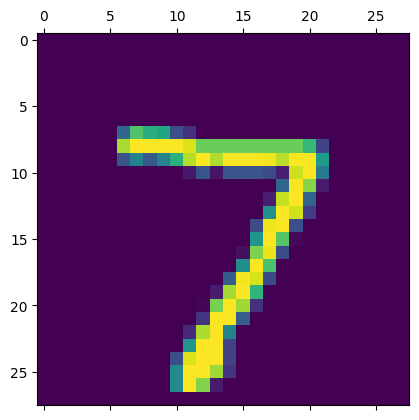

In [81]:
plt.matshow(X_test[0])

In [82]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9140 - loss: 0.3008


[0.26474297046661377, 0.9254999756813049]

In [83]:
y_predicted=model.predict(X_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


array([1.2381241e-02, 3.7341960e-07, 6.7912072e-02, 9.6049583e-01,
       1.7495542e-03, 1.3231049e-01, 2.6595676e-06, 9.9978220e-01,
       9.3429811e-02, 6.9636571e-01], dtype=float32)

In [84]:
np.argmax(y_predicted[0])

np.int64(7)

In [85]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted[:5]

array([[1.23812407e-02, 3.73419596e-07, 6.79120719e-02, 9.60495830e-01,
        1.74955418e-03, 1.32310495e-01, 2.65956760e-06, 9.99782205e-01,
        9.34298113e-02, 6.96365714e-01],
       [4.03827488e-01, 7.28438143e-03, 9.99780476e-01, 4.07257795e-01,
        5.99159833e-10, 9.02075768e-01, 9.22637522e-01, 1.72790384e-12,
        1.85023278e-01, 3.32761041e-09],
       [3.73757299e-04, 9.93197620e-01, 6.92494452e-01, 2.92885363e-01,
        2.18402240e-02, 1.25636384e-01, 1.85172170e-01, 1.54990092e-01,
        4.04402584e-01, 4.91799712e-02],
       [9.98726726e-01, 2.21124559e-08, 1.61398262e-01, 6.25260780e-03,
        3.86520005e-05, 9.41555202e-02, 2.30770797e-01, 2.37695444e-02,
        2.87792832e-02, 2.58847978e-02],
       [2.46737152e-02, 4.62283133e-05, 1.84452653e-01, 4.07095207e-03,
        9.91984725e-01, 1.42959505e-02, 1.92634508e-01, 2.67962366e-01,
        2.88053691e-01, 7.14305639e-01]], dtype=float32)

In [86]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [87]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    3,    2,    0,    6,   13,    3,    3,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    8,  933,   16,    7,    4,   12,   10,   35,    4],
       [   2,    0,   27,  913,    0,   27,    2,   11,   21,    7],
       [   1,    1,    7,    0,  907,    0,   14,    5,   10,   37],
       [   7,    2,    5,   26,    8,  785,   18,    6,   27,    8],
       [   7,    3,    7,    1,    7,   11,  919,    2,    1,    0],
       [   1,    6,   24,    3,    5,    0,    0,  955,    1,   33],
       [   5,    7,    8,   17,    9,   28,   10,   12,  869,    9],
       [   8,    7,    3,    8,   28,    7,    0,   27,    8,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

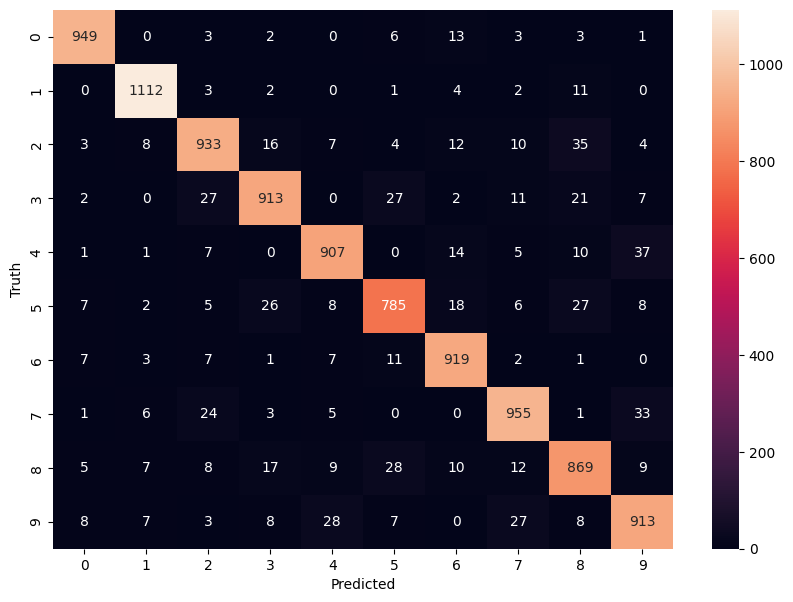

In [88]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
# hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten,y_train, epochs=5)

/Users/ayush_dhanker/Documents/ML algo/Deep-Learning/.env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.8758 - loss: 0.4429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.9625 - loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.9747 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.9809 - loss: 0.0636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.9858 - loss: 0.0478


In [90]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.9718 - loss: 0.0938


[0.08125025779008865, 0.9758999943733215]

In [91]:
# without flattenging the array,keras will do it
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=5)

/Users/ayush_dhanker/Documents/ML algo/Deep-Learning/.env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.8720 - loss: 0.4512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9614 - loss: 0.1350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9738 - loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.9803 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.9844 - loss: 0.0510
